In [1]:
def insta_searching(word):
    url = 'http://www.instagram.com/explore/tags/' + word
    return url

In [2]:
from selenium import webdriver

driver = webdriver.Chrome('C:/Users/babu6/Downloads/chromedriver.exe')


In [3]:
import time

driver.get('https://www.instagram.com')
time.sleep(3)

In [7]:
email = 'kim123@emali.com'  # input your account
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = 'input your password'
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()

In [8]:
word = '제주도맛집'
url = insta_searching(word)
driver.get(url)

In [9]:
def select_first(driver):
    first = driver.find_element_by_css_selector("div._9AhH0")
    first.click()
    time.sleep(3)
    
select_first(driver)

In [10]:
import re
from bs4 import BeautifulSoup

def get_content(driver):
    # ① 현재 페이지 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    # ② 본문 내용 가져오기
    try:
        content = soup.select('div.C4VMK > span')[0].text
    except:
        content = ' '
    # ③ 본문 내용에서 해시태그 가져오기(정규식 활용)
    tags = re.findall(r'#[^\s#,\\]+', content)  
    # ④ 작성일자 정보 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    # ⑤ 좋아요 수 가져오기
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
    except:
        like = 0
    # ⑥ 위치정보 가져오기
    try: 
        place = soup.select('div.M30cS')[0].text
    except:
        place = ''
    # ⑦ 수집한 정보 저장하기
    data = [content, date, like, place, tags]
    return data

get_content(driver)

print(get_content(driver)[:2])

['(광고)전복한상 주문하면 전복이풀코스에 옥돔구이까지가격은 55.000원 착한 가격에푸짐한 구성이라 도민들 사이에서도입소문이 자자해💕⠀핵갓성비 대게풀코스💕4인상 주문하면 맛좋은반찬들과 스끼다시가 한상가득차려지고 랍스터버터구이 서비스와싱싱한 해산물 , 물회뿐 아니라👌👌튀김과 마무리로 해물탕까지 나와서배터지게 먹고 간다는 "연동대게회타운"맛과 양 모두 만족하는 찐로컬맛집이라강추해주고 싶은 맛집이었어요😍😍⠀🧭연동대게회타운🗺제주 제주시 신대로 125⏰매일 11:00 - 01:00 연중무휴📞064-903-1889#제주도민맛집 #제주맛집#제주도맛집 #제주맛집추천#제주도맛집추천#제주여행 #제주도여행#제주도#제주가볼만한곳#제주핫플', '2020-09-16']


In [11]:
def move_next(driver):

    right = driver.find_element_by_css_selector ('a.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)

move_next(driver)

# 모든 단계 합치기

In [15]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

driver = webdriver.Chrome('C:/Users/babu6/Downloads/chromedriver.exe')

driver.get('https://www.instagram.com')
time.sleep(3)

######## 인스타 계정 로그인이 필요합니다 #########
email = ' '   ### 계정 정보 수정 필요
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = ' ' ### 비번 정보 수정 필요
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()

In [17]:
word = "제주관광"    #검색어
url = insta_searching(word)

# ③ 검색페이지 접속하기
driver.get(url)
time.sleep(3)

# ④ 첫 번째 게시글 열기
select_first(driver)

# ⑤ 비어있는 변수(results)만들기
results = []


# ⑥→⑦→⑧ 여러 게시물 수집하기
target = 100      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(3)
        move_next(driver)
    

print(results[:2])

Exception ignored in: <function Service.__del__ at 0x0000020D24D4D0D0>
Traceback (most recent call last):
  File "C:\Users\babu6\anaconda3\lib\site-packages\selenium\webdriver\common\service.py", line 176, in __del__
    self.stop()
  File "C:\Users\babu6\anaconda3\lib\site-packages\selenium\webdriver\common\service.py", line 151, in stop
    self.send_remote_shutdown_command()
  File "C:\Users\babu6\anaconda3\lib\site-packages\selenium\webdriver\common\service.py", line 132, in send_remote_shutdown_command
    if not self.is_connectable():
  File "C:\Users\babu6\anaconda3\lib\site-packages\selenium\webdriver\common\service.py", line 115, in is_connectable
    return utils.is_connectable(self.port)
  File "C:\Users\babu6\anaconda3\lib\site-packages\selenium\webdriver\common\utils.py", line 106, in is_connectable
    socket_ = socket.create_connection((host, port), 1)
  File "C:\Users\babu6\anaconda3\lib\socket.py", line 796, in create_connection
    sock.connect(sa)
KeyboardInterrupt: 

[['아 쿠 아 플 라 넷 제 주.빠밤~~! 🍌🍌미니언이 아쿠아플라넷에 상륙!!💛귀여운 미니언 친구들을 제주에서 만나보세요~!아쿠아플라넷 제주에서 만나는 귀여운 친구들!바다친구들과 귀여운 미니언친구들을 만날 수 있는 아쿠아플라넷으로 놀러오세요!.📢아쿠아플라넷에서 알려드립니다!🔸입장 고객 건강 체크를 실시합니다.마스크 미착용 및 37.5도 이상 발열 고객은입장이 제한됩니다(열화상카메라 운영)🔸항바이러스 필터 공조 시스템 운영 및정기적 소독/방역 활동을 강화합니다.🔸제주의 바다/오션 아레나(공연장)은거리두기 좌석을 운영합니다!🔸입장 인원 수를 관리합니다...🐋아쿠아플라넷 제주🐠🐬위치 : 제주도 서귀포시 성산읍 섭지코지로 95🐬시간 : 매일 10:00~19:00🐬매표마감 : 18:00🐬입장마감 : 18:30🐬문의전화 : 1833-7001..#제주도여행#제주도아쿠아플라넷#제주도가볼만한곳#제주여행지추천#성산가볼만한곳#제주여행중#제주핫플레이스#제주도여행코스#제주관광#제주실내관광지#서귀포핫플#제주데이트코스', '2020-07-27', 0, '', ['#제주도여행', '#제주도아쿠아플라넷', '#제주도가볼만한곳', '#제주여행지추천', '#성산가볼만한곳', '#제주여행중', '#제주핫플레이스', '#제주도여행코스', '#제주관광', '#제주실내관광지', '#서귀포핫플', '#제주데이트코스']], ['.바다 속에서한가롭게 즐기는 휴식#아쿠아플라넷 제주와 함께 하세요!다가오는 주말은아쿠아와에서🐬.📢아쿠아플라넷에서 알려드립니다!🔸입장 고객 건강 체크를 실시합니다.마스크 미착용 및 37.5도 이상 발열 고객은입장이 제한됩니다(열화상카메라 운영)🔸항바이러스 필터 공조 시스템, 울파필터 냉방 시스템 운영 및정기적 소독/방역 활동을 강화합니다.🔸제주의 바다/오션 아레나(공연장)은거리두기 좌석을 운영합니다!🔸입장 인원 수를 관리합니다...🐋아쿠아플라넷 제주🐠🐬위치 : 제주도 서귀포시 성산읍 섭지코지로 95🐬시간 : 매일 10:00~19:00🐬매표마감 : 18:00🐬입장마감 : 18:30🐬

In [20]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel('./files/3_1_crawling_jejuGwanGwang.xlsx')

In [25]:
jeju_insta_df = pd.DataFrame( [ ] )

folder = './files/'
f_list = ['3_1_crawling_jejudoMatJip.xlsx', '3_1_crawling_jejuGwanGwang.xlsx', '3_1_crawling_jejuMatJip.xlsx', '3_1_crawling_jejuYeoHang.xlsx']
for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)

jeju_insta_df.columns =['index','content','data','like','place','tags']

In [27]:
jeju_insta_df = jeju_insta_df.drop(columns = 'index')
jeju_insta_df.head()

,content,data,like,place,tags
0,착한집.수산물 인생 50년의 장인이 만든가장 신선한 생선을 유통 단계를 빼어가장 착...,2020-09-14,0,NaN,"['#제주맛집', '#제주도맛집', '#제주공항근처맛집', '#제주갈치조림', '#..."
1,.오늘의 스페셜 메뉴를 찾는다면!산도롱맨도롱의 갈비국수와 함께!취향따라 선택하는 특...,2020-09-14,0,NaN,"['#제주맛집', '#제주도맛집', '#성산일출봉맛집', '#성산맛집', '#섭지코..."
2,.산도롱맨도롱의 신메뉴!#모물모물 모물은 제주도 사투리로메밀을 뜻해요!메밀 최대 산...,2020-09-14,"1,144",NaN,"['#모물모물', '#제주도맛집', '#제주맛집', '#성산맛집', '#성산일출봉맛..."
3,🌴제주도에 왔다면 이건 꼭 먹어봐야죠‼️#순...,2020-09-14,0,순천미향,"['#순천미향', '#제주삼합아직도', '#제주ᄃ..."
4,너무나 맛있는 돈오름숯불갈비👍제가 아는 형님이 운영중인 곳인데전에 푸른밤과 돼지껍떼...,2020-09-14,"1,702",NaN,"['#제주도맛집', '#제주흑돼지맛집', '#제주차돌된장찌개', '#껍떼기맛집', ..."


In [28]:
jeju_insta_df.drop_duplicates(subset = ['content'], inplace = True)
jeju_insta_df.to_excel('./files/3_1_crawling_raw.xlsx', index = False)

In [29]:
import pandas as pd
raw_total = pd.read_excel('./files/3_1_crawling_raw.xlsx')
raw_total['tags'][:3]

0    ['#제주맛집', '#제주도맛집', '#제주공항근처맛집', '#제주갈치조림', '#...
1    ['#제주맛집', '#제주도맛집', '#성산일출봉맛집', '#성산맛집', '#섭지코...
2    ['#모물모물', '#제주도맛집', '#제주맛집', '#성산맛집', '#성산일출봉맛...
Name: tags, dtype: object

In [30]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [31]:
from collections import Counter
tag_counter = Counter(tags_total)

In [32]:
tag_counter.most_common(50)

[('#제주맛집', 78),
 ('#제주도맛집', 66),
 ('#제주여행', 63),
 ('', 51),
 ('#제주도여행', 46),
 ('#제주', 42),
 ('#제주도', 31),
 ('#중문맛집', 25),
 ('#제주도민맛집', 22),
 ('#제주핫플', 21),
 ('#애월맛집', 20),
 ('#제주카페', 20),
 ('#서귀포맛집', 20),
 ('#제주관광', 16),
 ('#제주도가볼만한곳', 14),
 ('#제주맛집추천', 14),
 ('#제주공항맛집', 14),
 ('#제주도여행코스', 13),
 ('#한림맛집', 13),
 ('#jeju', 13),
 ('#제주핫플레이스', 12),
 ('#맞팔', 12),
 ('#제주현지인맛집', 10),
 ('#곽지맛집', 10),
 ('#한담맛집', 10),
 ('#제주도카페', 10),
 ('#오설록맛집', 10),
 ('#제주맛집', 9),
 ('#애월카페', 9),
 ('#협재맛집', 9),
 ('#제주도민', 9),
 ('#제주스타그램', 9),
 ('#제주게스트하우스', 9),
 ('#제주파티', 9),
 ('#제주가볼만한곳', 8),
 ('#제주도핫플레이스', 8),
 ('#고래배꼽', 8),
 ('#좋아요반사', 8),
 ('#좋반', 8),
 ('#낭만', 8),
 ('#2030전용', 8),
 ('#젊은청춘남녀', 8),
 ('#메르블루게스트하우스', 8),
 ('#함덕게스트하우스', 8),
 ('#하도게스트하우스', 8),
 ('#우도게스트하우스', 8),
 ('#제주도게스트하우스', 8),
 ('#제주도게스트하우스추천', 8),
 ('#제주게스트하우스파티', 8),
 ('#성산게스트하우스', 8)]

In [33]:
STOPWORDS = ['#일상','#선팔','#제주도','#jeju','#반영구','#제주자연눈썹','#서귀포눈썹문신','#제주눈썹문신',
             '#소통','#맞팔', '#좋아요반사','#좋반']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)

tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주맛집', 78),
 ('#제주도맛집', 66),
 ('#제주여행', 63),
 ('', 51),
 ('#제주도여행', 46),
 ('#제주', 42),
 ('#중문맛집', 25),
 ('#제주도민맛집', 22),
 ('#제주핫플', 21),
 ('#애월맛집', 20),
 ('#제주카페', 20),
 ('#서귀포맛집', 20),
 ('#제주관광', 16),
 ('#제주도가볼만한곳', 14),
 ('#제주맛집추천', 14),
 ('#제주공항맛집', 14),
 ('#제주도여행코스', 13),
 ('#한림맛집', 13),
 ('#제주핫플레이스', 12),
 ('#제주현지인맛집', 10),
 ('#곽지맛집', 10),
 ('#한담맛집', 10),
 ('#제주도카페', 10),
 ('#오설록맛집', 10),
 ('#제주맛집', 9),
 ('#애월카페', 9),
 ('#협재맛집', 9),
 ('#제주도민', 9),
 ('#제주스타그램', 9),
 ('#제주게스트하우스', 9),
 ('#제주파티', 9),
 ('#제주가볼만한곳', 8),
 ('#제주도핫플레이스', 8),
 ('#고래배꼽', 8),
 ('#낭만', 8),
 ('#2030전용', 8),
 ('#젊은청춘남녀', 8),
 ('#메르블루게스트하우스', 8),
 ('#함덕게스트하우스', 8),
 ('#하도게스트하우스', 8),
 ('#우도게스트하우스', 8),
 ('#제주도게스트하우스', 8),
 ('#제주도게스트하우스추천', 8),
 ('#제주게스트하우스파티', 8),
 ('#성산게스트하우스', 8),
 ('#제주도게스트하우스파티', 8),
 ('#세화게스트하우스', 8),
 ('#제주도게하', 8),
 ('#제주도파티', 8),
 ('#제주도클럽', 8)]

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in['win32','win64']:
    font_name = 'malgun gothic'
elif sys.platform == 'darwin':
    font_name = 'AppleGothic'
rc('font', family = font_name)

In [36]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags','counts']
tag_counts_df.head()

,tags,counts
0,#제주맛집,78
1,#제주도맛집,66
2,#제주여행,63
3,,51
4,#제주도여행,46


<AxesSubplot:xlabel='counts', ylabel='tags'>

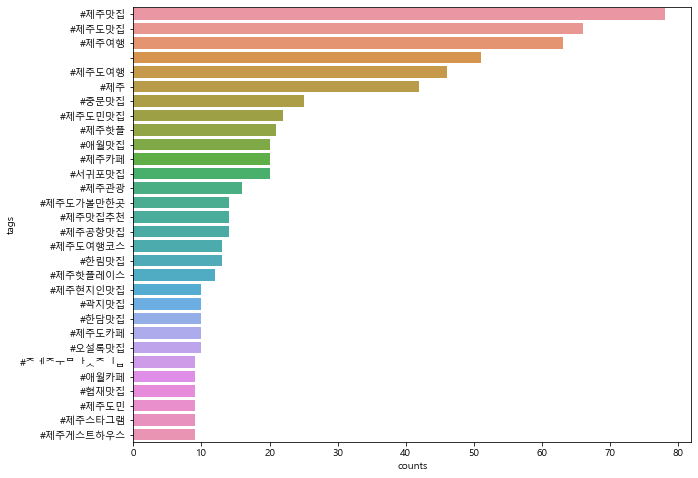

In [37]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df)

In [38]:
!pip install wordcloud

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

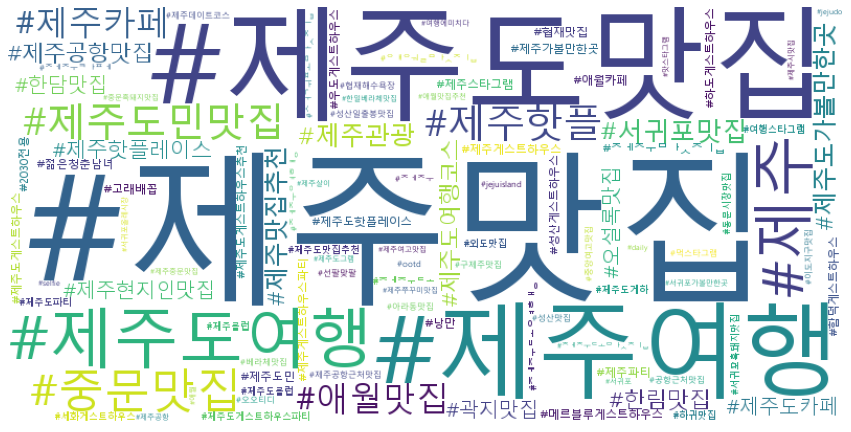

In [40]:
wordcloud = WordCloud(font_path = font_path,
                     background_color = 'white',
                     max_words = 100,
                     relative_scaling = 0.3,
                     width = 800,
                     height = 400).generate_from_frequencies(tag_counts_selected)

plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files/3_2_tag-wordcloud.png')